In [27]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [28]:
data = pd.read_csv('train.csv')

In [29]:
data.shape

(45593, 20)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [31]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


# Clean Time Taken

In [32]:
data["Delivery_person_ID"].nunique()

1320

In [33]:
data["Time_taken(min)"].describe()

count        45593
unique          45
top       (min) 26
freq          2123
Name: Time_taken(min), dtype: object

In [34]:
data["Time_taken(min)"].unique()

array(['(min) 24', '(min) 33', '(min) 26', '(min) 21', '(min) 30',
       '(min) 40', '(min) 32', '(min) 34', '(min) 46', '(min) 23',
       '(min) 20', '(min) 41', '(min) 15', '(min) 36', '(min) 39',
       '(min) 18', '(min) 38', '(min) 47', '(min) 12', '(min) 22',
       '(min) 25', '(min) 35', '(min) 10', '(min) 19', '(min) 11',
       '(min) 28', '(min) 52', '(min) 16', '(min) 27', '(min) 49',
       '(min) 17', '(min) 14', '(min) 37', '(min) 44', '(min) 42',
       '(min) 31', '(min) 13', '(min) 29', '(min) 50', '(min) 43',
       '(min) 48', '(min) 54', '(min) 53', '(min) 45', '(min) 51'],
      dtype=object)

In [35]:
data["Time_taken(min)"] = data["Time_taken(min)"].str.extract('(\d+)')


In [36]:
data["Time_taken(min)"] = pd.to_numeric(data["Time_taken(min)"])
data["Time_taken(min)"].dropna()
data["Time_taken(min)"].astype('int64')

0        24
1        33
2        26
3        21
4        30
         ..
45588    32
45589    36
45590    16
45591    26
45592    36
Name: Time_taken(min), Length: 45593, dtype: int64

In [37]:
data["Time_taken(min)"].unique()

array([24, 33, 26, 21, 30, 40, 32, 34, 46, 23, 20, 41, 15, 36, 39, 18, 38,
       47, 12, 22, 25, 35, 10, 19, 11, 28, 52, 16, 27, 49, 17, 14, 37, 44,
       42, 31, 13, 29, 50, 43, 48, 54, 53, 45, 51], dtype=int64)

In [38]:
data["Time_taken(min)"].dropna()

0        24
1        33
2        26
3        21
4        30
         ..
45588    32
45589    36
45590    16
45591    26
45592    36
Name: Time_taken(min), Length: 45593, dtype: int64

In [41]:
data["Time_taken(min)"].count()

45593

# Clean Delivery Person Age

In [43]:
data = data.drop(trainData[trainData['Delivery_person_Ratings']=='NaN '].index)
data = data.astype({'Delivery_person_Ratings':'float64'})
data['Delivery_person_Ratings'].unique()

array([4.9, 4.5, 4.4, 4.7, 4.6, 4.8, 4.2, 4.3, 4. , 4.1, 5. , 3.5, 3.8,
       3.9, 3.7, 2.6, 2.5, 3.6, 3.1, 2.7, 1. , 3.2, 3.3, 6. , 3.4, 2.8,
       2.9, 3. ])

<AxesSubplot:xlabel='Delivery_person_Ratings', ylabel='Count'>

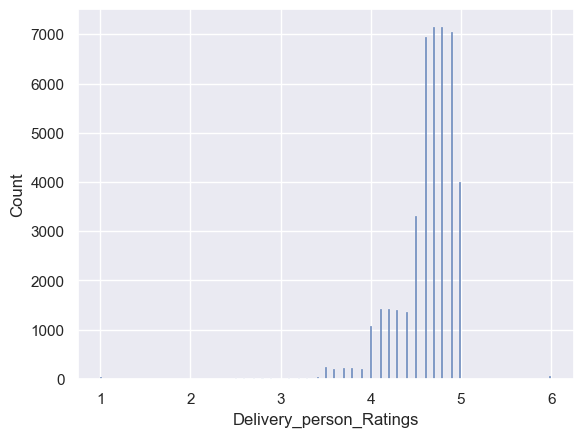

In [52]:
sb.histplot(data = data['Delivery_person_Ratings'])

# Clean Delivery Person Ratings

In [53]:
data["Delivery_person_Age"] = pd.to_numeric(data["Delivery_person_Age"])
data["Delivery_person_Age"].astype('int64')
data["Delivery_person_Age"].unique()

array([37, 34, 23, 38, 32, 22, 33, 35, 36, 21, 24, 29, 25, 31, 27, 26, 20,
       28, 39, 30, 15, 50], dtype=int64)

<AxesSubplot:xlabel='Delivery_person_Age', ylabel='Count'>

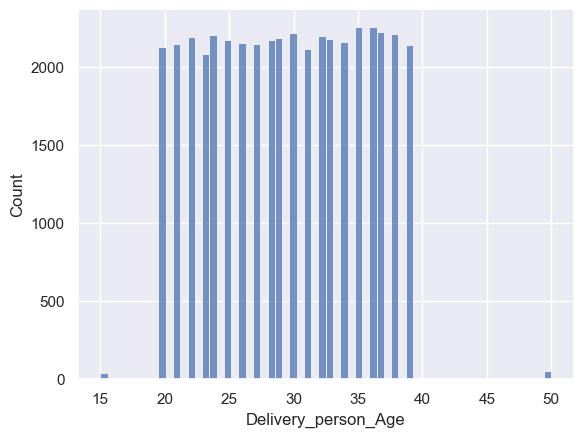

In [54]:
sb.histplot(data = data["Delivery_person_Age"])

### Clean Outliers

In [57]:
data = data[~(data['Delivery_person_Age'] <= 15)]  

In [58]:
data = data[~(data['Delivery_person_Age'] >= 50)]  

<AxesSubplot:xlabel='Delivery_person_Age', ylabel='Count'>

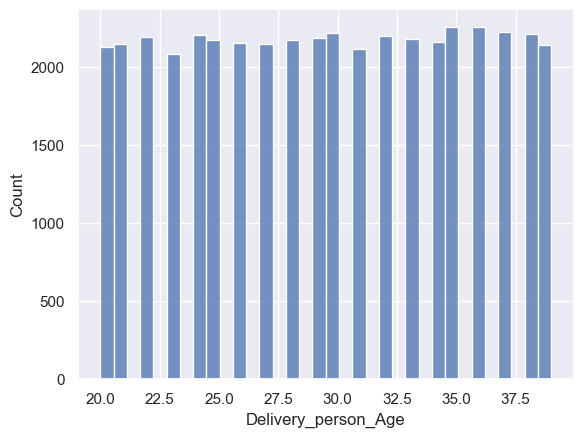

In [59]:
sb.histplot(data = data["Delivery_person_Age"])

# Time Taken agaisnt Weather Condtions

In [47]:
data['Weatherconditions'] = data['Weatherconditions'].str.replace("conditions", "")  
print("Number of Conditions :", len(data["Weatherconditions"].unique()))
print(data.groupby('Weatherconditions', as_index=False)['Time_taken(min)'].mean())

Number of Conditions : 7
  Weatherconditions  Time_taken(min)
0            Cloudy        28.924419
1               Fog        28.936516
2               NaN        24.802198
3        Sandstorms        25.878005
4            Stormy        25.870758
5             Sunny        21.852413
6             Windy        26.106365


In [48]:
data.describe

<bound method NDFrame.describe of             ID Delivery_person_ID Delivery_person_Age  \
0      0x4607     INDORES13DEL02                   37   
1      0xb379     BANGRES18DEL02                   34   
2      0x5d6d     BANGRES19DEL01                   23   
3      0x7a6a    COIMBRES13DEL02                   38   
4      0x70a2     CHENRES12DEL01                   32   
...        ...                ...                 ...   
45588  0x7c09      JAPRES04DEL01                   30   
45589  0xd641      AGRRES16DEL01                   21   
45590  0x4f8d     CHENRES08DEL03                   30   
45591  0x5eee    COIMBRES11DEL01                   20   
45592  0x5fb2   RANCHIRES09DEL02                   23   

       Delivery_person_Ratings  Restaurant_latitude  Restaurant_longitude  \
0                          4.9            22.745049             75.892471   
1                          4.5            12.913041             77.683237   
2                          4.4            12.91426

In [49]:
data.describe()

,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,Time_taken(min)
count,43685.000000,43685.000000,43685.000000,43685.000000,43685.000000,43685.000000,43685.000000
mean,4.633780,17.214543,70.668593,17.458164,70.829376,1.004738,26.289024
std,0.334716,7.750885,21.459258,7.339296,21.136728,0.820961,9.369354
min,1.000000,-30.902872,-88.366217,0.010000,0.010000,0.000000,10.000000
25%,4.500000,12.933298,73.170283,12.985996,73.280000,0.000000,19.000000
50%,4.700000,18.551440,75.898497,18.633626,76.002574,1.000000,26.000000
75%,4.900000,22.732225,78.045359,22.785049,78.103162,2.000000,32.000000
max,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,54.000000
